# Exercises 1

## 1.1) Testing Parallel Random Number Generator

In the following exercises, we aim to evaluate the quality of the given "Parallel Random Number Generator". To do so, we calculate the mean value and the variance of random number from a uniform distribution ranged in $[0,1)$, veryfing that they converge respectively to 1/2 and to 1/12:

$$\langle r \rangle = \int_0^1 r dr = 1/2$$

$$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$$

We use the <i>"Data blocking method"</i> to avoid potential correlations among data due to intrinsic determinism of the algorithm:
1. the $M=10^4$ throws are divided into $N=10^2$ blocks; 
2. mean values, variances and rispective errors are calculated for each block; 
3. at the end, we have $10^2$ couples $(i,y_i)$, where $i=0,1..., N-1$ is the block index and $y_{i}$ is the mean value or the variance of each block.
4. we calculate the cumulative effect progressively summing up $y_i$ values and evaluating the error as the standard deviation of the mean.

In order to show the results, we draw down a graph showing the cumulative effect and so the tendency of converging to respective values while increasing the number of throws $M$ considered.

### a) Mean

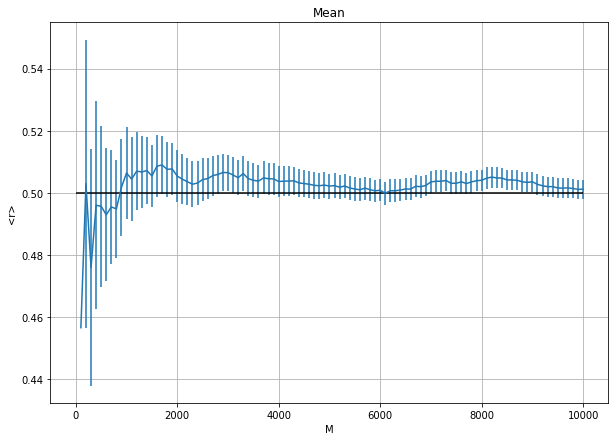

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y,err=np.loadtxt("ex1-1/mean.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,y,yerr=err)
plt.hlines(0.5, 0, 10000)
plt.xlabel('M')
plt.ylabel('<r>')
plt.title("Mean")
plt.grid(True)
plt.show()

This output confirms our expectations:
1. the mean values converge to 0.5;
2. the error bars get smaller while the throws number increses.

The only fact that can rise doubts is about error bars not always including the real mean value. This point can be explained just considering that the error values are actually the standard deviations of the distribution at each step and they include just about 2/3 of the total cases.

### b) Variance

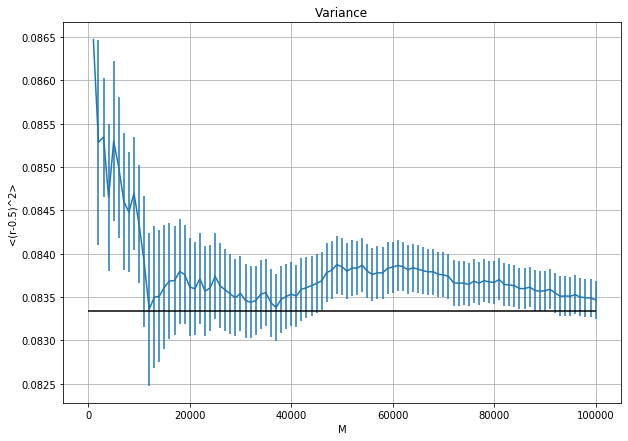

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y,err=np.loadtxt("ex1-1/variance.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,y,yerr=err)
plt.hlines(0.083333, 0, 100000)
plt.xlabel('M')
plt.ylabel('<(r-0.5)^2>')
plt.grid(True)
plt.title("Variance")
plt.show()

**Note:** I decided to increse M value to $M=10^5$ in order to show better the convergence of the results.

Again, this output graph confirms our expectations.

### c) $\chi^2$ test

Now we use the $\chi^2$ expression to test the effective uniformity of the generator:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
What we do is, first of all, considering our interval splitted into $M=100$ subintervals $i=0, 1, ... M-1$; then we throw $n=10^4$ random numbers, which theoretically should be equally divided into the subintervals ($n/M=100$ per subinterval). What we actually count is $n_{i}$ random numbers per subinterval.
We expect on average that $(n_i - n/M)^2 \simeq n/M$ and so $\chi^2 \simeq M =100$. If the mean were higher, the generator would unlikely be uniform.
We repeate the calculation 100 times.


**Note**: The graph we expect should be different from the previous ones: we should not notice any tendecy in data but fluctations of approximately same amplitude around the mean value, because each iteration should be indipendent from the previous one.

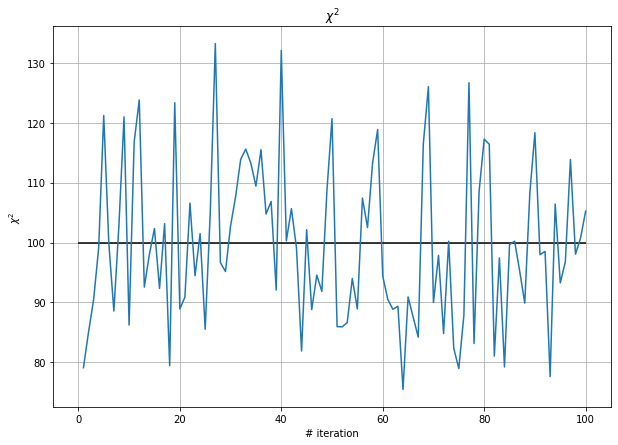

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y=np.loadtxt("ex1-1/chi.out",usecols=(0,1),unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,y)
plt.hlines(100, 0, 100)
plt.xlabel('# iteration')
plt.ylabel('$\chi^2$')
plt.title('$\chi^2$')
plt.grid(True)
plt.show()

As expected, $\chi^2$ values are distributed around the mean value 100. 

## 1.2) Inversion of the Cumulative and Central Limit Theorem

The first purpose of this exercise is to extend the given Pseudo-Random Number generator with two other distributions:


1. **exponential distribution**: $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$


2. **Cauchy-Lorentz distribution**: $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$

The method we use to achieve this goal is the <i>inversion of the cumulative distribution</i>, so the calculation results to be:

$$ F(x) = \int_{0}^{x}p(x')dx'=:y \rightarrow x= F^{-1}(y)$$ 
where $y$ is extracted from a standard uniform distribution [0,1).
In particular we obtain:
1. $ x=-\frac{1}{\lambda}\ln(1-y) $
2. $ x=\Gamma \tan [\pi (y-\frac{1}{2})] +\mu $

The main goal of this exercise is testing the <i>Central Limit Theorem</i>. It states that the sum (or the mean) of a large number of indipendent and identically destributed variables tends toward a Gaussian distribution and this is valid for whatever input distribution is considered but having a finite variance.

For a given N, the sum of the indipendent and identically destributed random numbers $x_{i}$ is:

$$S_N=\frac{1}{N}\sum_{1}^{N}x_i$$
and its pdf results to be:

$ P_N (S_N) \rightarrow \frac{1}{\sqrt{2 \pi \sigma _{S_N}^{2}}} e^{-\frac{(S_N- \mu)^{2}}{2 \sigma _{S_N}^{2}}}$ for $N \rightarrow \infty$

To achieve this purpose, we draw three pictures for each distribution considered:
1. standard dice throws: uniform distribution of integrals selected in the interval [0,7));
2. exponential distribution with $\lambda=1$;
3. Lorentzian distribution with $\mu=0$ and $\Gamma=1$;

for each picture we will show four histograms (N=1,2,10,100) to highlight the tendency of the sum toward the Gaussian (or Lorentzian) distribution. Each histogram is filled by $10^4$ iterations of the experiment.

#### a) Standard dice

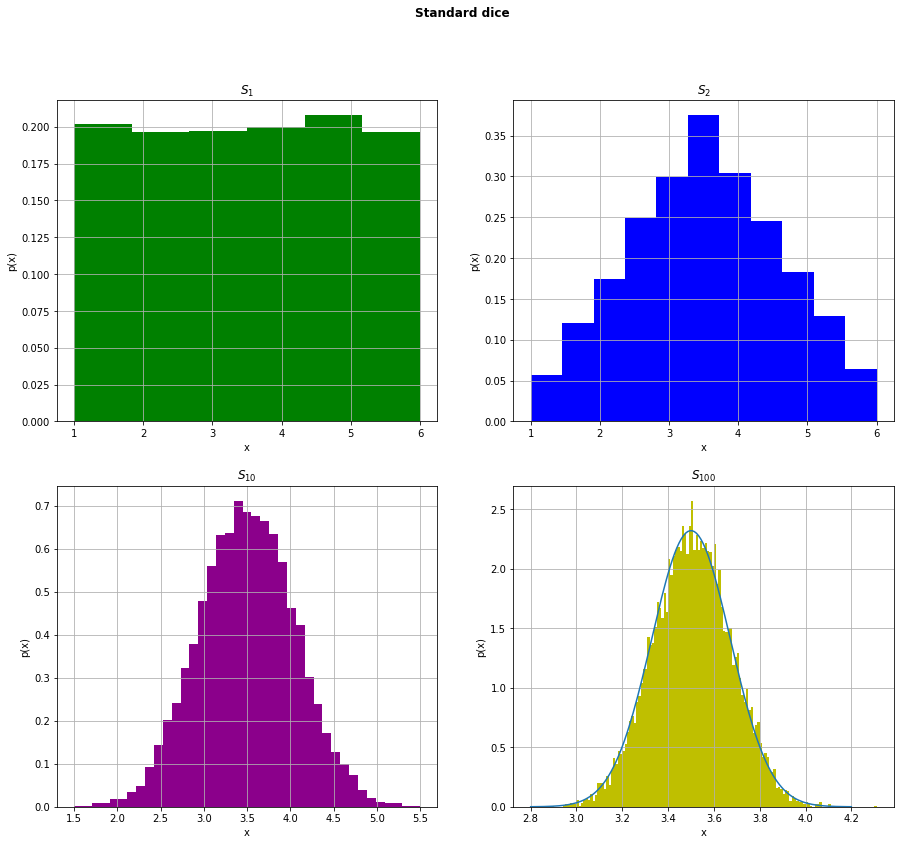

In [12]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x1=np.loadtxt("ex1-2/dice.out", skiprows=0, max_rows=10000, unpack= True)
x2=np.loadtxt("ex1-2/dice.out", skiprows=10000, max_rows=10000)
x10=np.loadtxt("ex1-2/dice.out",skiprows=20000, max_rows=10000)
x100=np.loadtxt("ex1-2/dice.out",skiprows=30000, max_rows=10000)

fig=plt.figure(figsize=(15, 13))
plt.suptitle('Standard dice', weight='bold')

#N=1
plt.subplot(221)
plt.hist(x1,6, color='green', density=True)
plt.title('$S_1$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=2
plt.subplot(222)
plt.hist(x2,11, color='blue', density=True)
plt.title('$S_2$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=10
plt.subplot(223)
plt.hist(x10,39, color='darkmagenta', density=True)
plt.title('$S_{10}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=100
plt.subplot(224)
plt.hist(x100,148, color='y', density=True)
plt.title('$S_{100}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#fitting 
parameter = norm.fit(x100) #parameter from data
x = np.linspace(2.8,4.2, 148) #x to plot
y = norm.pdf(x, *parameter) #evaluate pdf
plt.plot(x, y)

plt.show()

**Note**: since this was not a continuous distribution, the determination of the bin number had to be well calibrated.

#### b) Exponential dice

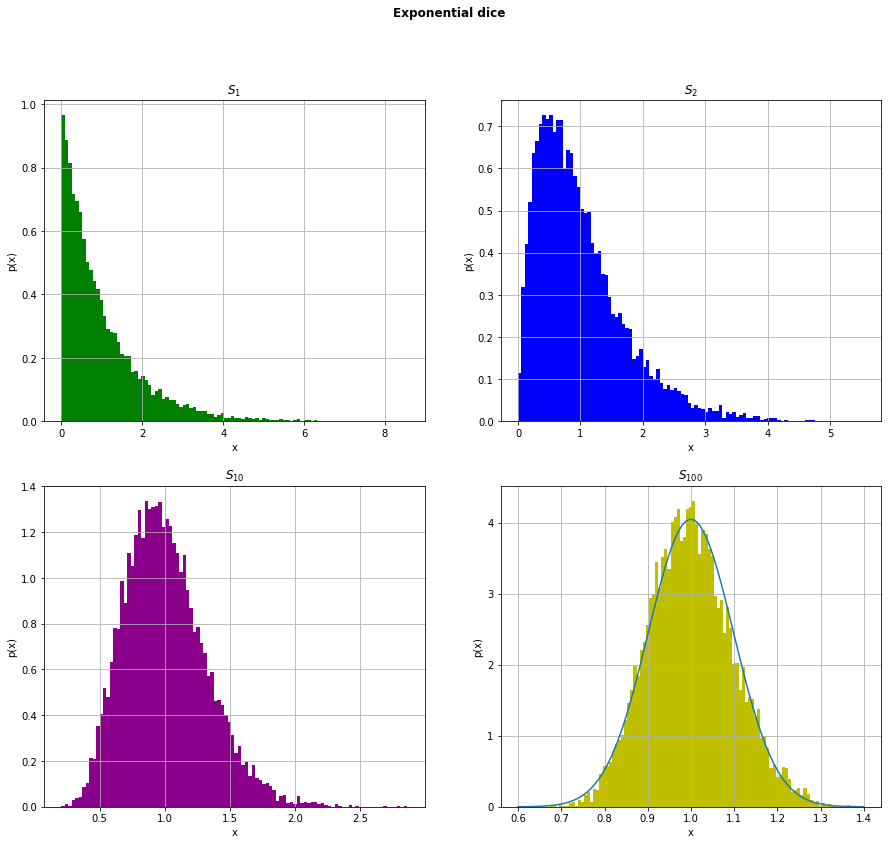

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


x1=np.loadtxt("ex1-2/exp.out", skiprows=0, max_rows=10000, unpack= True)
x2=np.loadtxt("ex1-2/exp.out", skiprows=10000, max_rows=10000)
x10=np.loadtxt("ex1-2/exp.out",skiprows=20000, max_rows=10000)
x100=np.loadtxt("ex1-2/exp.out",skiprows=30000, max_rows=10000)

fig=plt.figure(figsize=(15, 13))
plt.suptitle('Exponential dice', weight='bold')

#N=1
plt.subplot(221)
plt.hist(x1,100, color='green', density=True)
plt.title('$S_1$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=2
plt.subplot(222)
plt.hist(x2,100, color='blue', density=True)
plt.title('$S_2$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=10
plt.subplot(223)
plt.hist(x10,100, color='darkmagenta', density=True)
plt.title('$S_{10}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=100
plt.subplot(224)
plt.hist(x100,100, color='y', density=True)
plt.title('$S_{100}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#fitting 
parameter = norm.fit(x100) 
x = np.linspace(0.6, 1.4, 100)
y = norm.pdf(x, *parameter)
plt.plot(x, y)

plt.show()

#### c) Lorentzian dice

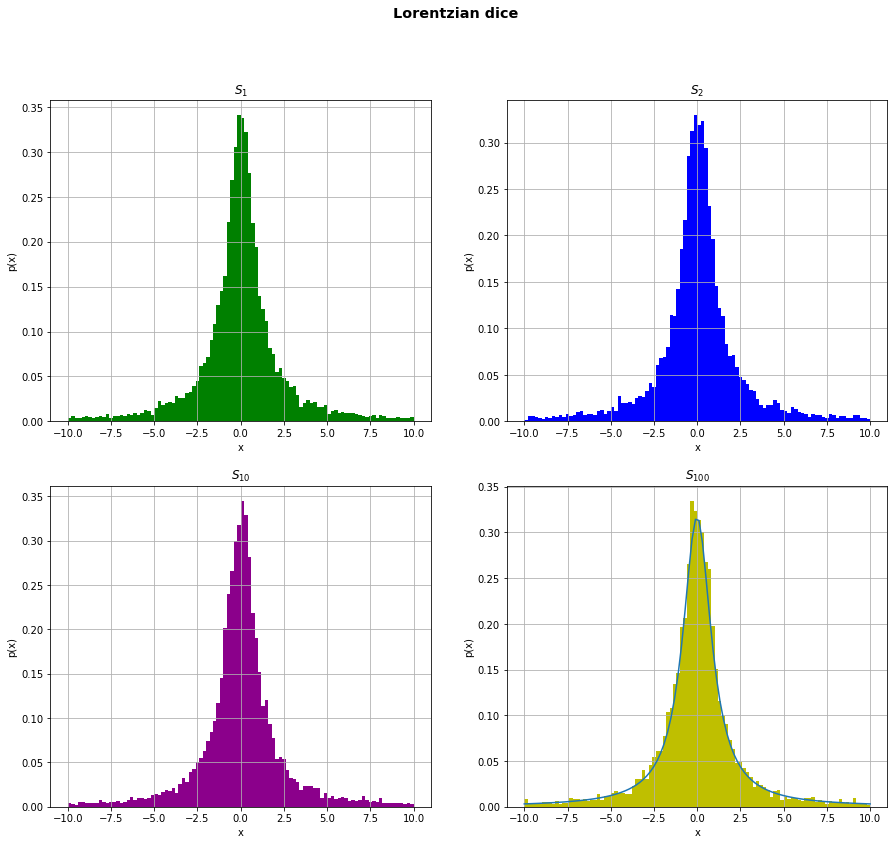

In [10]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy


x1=np.loadtxt("ex1-2/lor.out", skiprows=0, max_rows=10000, unpack= True)
x2=np.loadtxt("ex1-2/lor.out", skiprows=10000, max_rows=10000)
x10=np.loadtxt("ex1-2/lor.out",skiprows=20000, max_rows=10000)
x100=np.loadtxt("ex1-2/lor.out",skiprows=30000, max_rows=10000)

fig=plt.figure(figsize=(15, 13))
plt.suptitle('Lorentzian dice', weight='bold', size='x-large')

#N=1
plt.subplot(221)
plt.hist(x1,100, range=(-10,10), color='green', density=True)
plt.title('$S_1$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=2
plt.subplot(222)
plt.hist(x2,100, range=(-10,10), color='blue', density=True)
plt.title('$S_2$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=10
plt.subplot(223)
plt.hist(x10,100, range=(-10,10), color='darkmagenta', density=True)
plt.title('$S_{10}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=100
plt.subplot(224)
plt.hist(x100,100, range=(-10,10), color='y', density=True)
plt.title('$S_{100}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#fitting
parameter = cauchy.fit(x100) 
x = np.linspace(-10, 10, 100)
y = cauchy.pdf(x, *parameter)
plt.plot(x, y)

plt.show()

The output histograms confirm succefully the expectations!

We can notice that in first pictures (N=1), the pdf p(x) resembles the input one, while increasing N up to 100, p(x) is shaped into a Gaussian (Lorentzian) distribution.

## 1.3) Buffon's experiment

It is possibile to use Buffon's experiment to determine $\pi$ value numerically as it follows.

The problem revolves around needles of a given length and a field marked with parallel lines, each equidistant from each other. Since this experiment is based on calculating the probability of a needle hitting a line in function of $\pi$, it is then sufficient eximating the probability with a MonteCarlo method (<i>"Hint-Miss"</i>) and we inversely obtain the approximated $\pi$ value:

$$P=\frac{2L}{\pi d} \rightarrow \pi=\lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

where $L$ is the needle lenght and $d$ is the space between the field lines.

<span style="color:purple">**<i>How to build the Monte Carlo Algorithm?</i>**</span>

1) <i>Where is the thrown needle?</i> $\rightarrow$ identication of its random position by a center $(x,y)$ and an orientation $\theta$.

**Note 1**: if we set the reference frame as the line sequence ortogonal to $x$ axis, we don't need to consider $y$ value.

**Note 2**: whatever are the problem dimensions, we can reduce the problem at a single "strip" $[0,d)$, for the same reasons that hold the <i>Periodic Boundary Conditions</i>.

- $x$ is chosen randomly in $[0,d)$;

- in order to random generate the $\theta$ angle, the idea is using the inverse function: $\theta=arctan(y/x)$, where $x$ and $y$ are randomly generated within a unit circonference. Even though it is defined in $[-\pi/2,\pi/2]$, this is not a problem because of the problem simmetry.


2) <i>When does it hit a line?</i> $\rightarrow$ When these two conditions are satisfied:

$$x-\frac{L}{2}cos \theta \leq 0 \qquad x+\frac{L}{2}cos \theta \geq d$$


**Note 3**: because of the previous conditions,  $\theta$ is chosen so that  $cos(\theta)\geq 0$.

We just need to remember to set all up with the <i>Data Blocking</i> and we have all the ingredients!

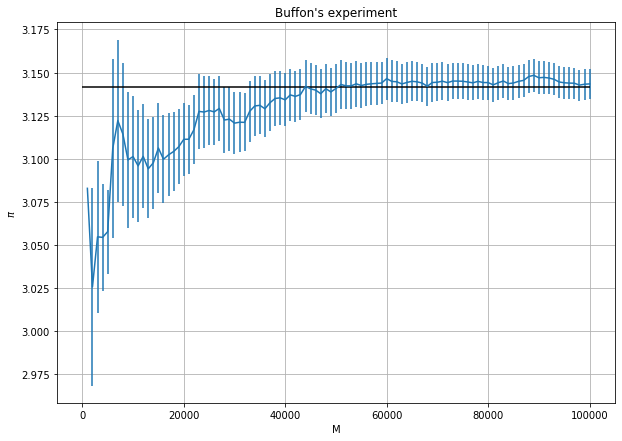

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y,err=np.loadtxt("ex1-3/pi.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,y,yerr=err)
plt.hlines(3.1415926, 0, 100000)
plt.xlabel('M')
plt.ylabel('$\pi$')
plt.grid(True)
plt.title("Buffon's experiment")
plt.show()

We can notice that the sampled $\pi$ converges at its real value as expected.